# Using sqlalchemy and pandas to read and write from and to a local sqlite database for Stock Market and Portfolio Anaylsis Tech Stocks and the S&P 500 in 2020 

This post includes code adapted from [python for finance and trading algorithms udemy course](https://udemy.com/python-for-finance-and-trading-algorithms/) and [python for finance and trading algorithms udemy course notebooks](https://github.com/theoneandonlywoj/Python-for-Financial-Analysis-and-Algorithmic-Trading) and the [documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_sql.html)

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

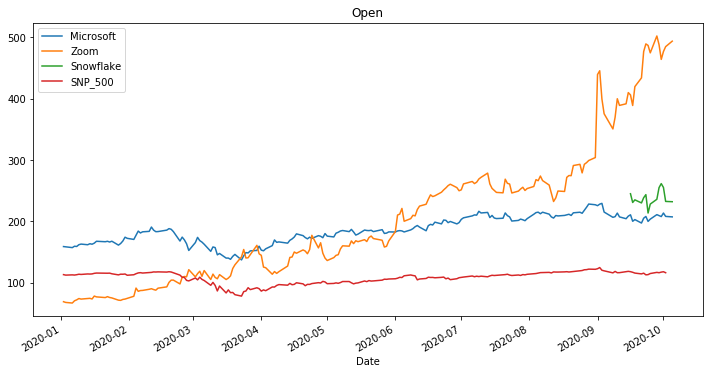

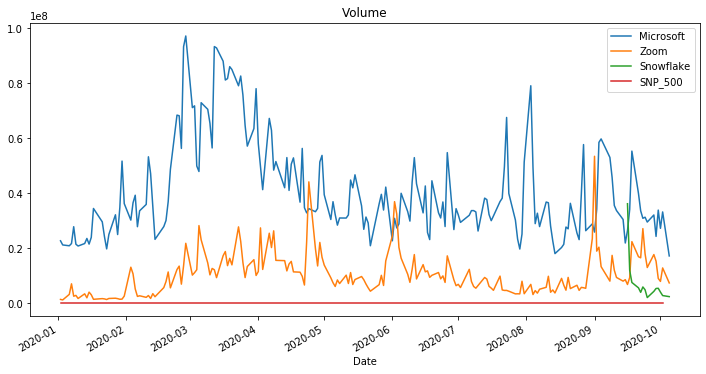

In [2]:
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('today')


FXAIX_stock = web.DataReader('FXAIX', 'yahoo', start, end)
FXAIX_stock.head()

MSFT_stock = web.DataReader('MSFT', 'yahoo', start, end)
MSFT_stock.head()

ZOOM_stock = web.DataReader('ZM', 'yahoo', start, end)
ZOOM_stock.head()

SNOW_stock = web.DataReader('SNOW', 'yahoo', start, end)
SNOW_stock.head()


fig = plt.figure(figsize=(12, 6))
plt.title('Open')

MSFT_stock['Open'].plot(label='Microsoft')
ZOOM_stock['Open'].plot(label='Zoom')
SNOW_stock['Open'].plot(label='Snowflake')
FXAIX_stock['Open'].plot(label='SNP_500')
plt.legend()

fig = plt.figure(figsize=(12, 6))
plt.title('Volume')

MSFT_stock['Volume'].plot(label='Microsoft')
ZOOM_stock['Volume'].plot(label='Zoom')
SNOW_stock['Volume'].plot(label='Snowflake')
FXAIX_stock['Volume'].plot(label='SNP_500')

plt.legend()

In [3]:
FXAIX_stock = web.DataReader('FXAIX', 'yahoo', start, end)
FXAIX_stock.head()

MSFT_stock = web.DataReader('MSFT', 'yahoo', start, end)
MSFT_stock.head()

ZOOM_stock = web.DataReader('ZM', 'yahoo', start, end)
ZOOM_stock.head()

SNOW_stock = web.DataReader('SNOW', 'yahoo', start, end)
SNOW_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-16,319.0,231.110001,245.000000,253.929993,36099700,253.929993
2020-09-17,241.5,215.240005,230.759995,227.539993,11907500,227.539993
2020-09-18,249.0,218.589996,235.000000,240.000000,7475400,240.000000
2020-09-21,241.5,218.600006,230.000000,228.850006,5524900,228.850006
2020-09-22,239.0,225.149994,238.500000,235.160004,3889100,235.160004


In [4]:
stocks = pd.concat([MSFT_stock['Open'], ZOOM_stock['Open'], SNOW_stock['Open'], FXAIX_stock['Open']],
                   axis = 1)

In [5]:
stocks.reset_index(level=0, inplace=True)

In [6]:
stocks

,Date,Open,Open,Open,Open
0,2020-01-02,158.779999,68.800003,NaN,112.980003
1,2020-01-03,158.320007,67.620003,NaN,112.190002
2,2020-01-06,157.080002,66.629997,NaN,112.589996
3,2020-01-07,159.320007,70.290001,NaN,112.290001
4,2020-01-08,158.929993,71.809998,NaN,112.839996
...,...,...,...,...,...
187,2020-09-29,209.350006,488.130005,255.000000,116.099998
188,2020-09-30,207.729996,464.209991,261.500000,117.070000
189,2020-10-01,213.490005,477.000000,255.250000,117.699997
190,2020-10-02,208.000000,485.005005,232.440002,116.120003


In [7]:
stocks.columns = ['Date','MSFT_stock','ZOOM_stock','SNOW_stock','FXAIX_stock']

In [8]:
stocks

,Date,MSFT_stock,ZOOM_stock,SNOW_stock,FXAIX_stock
0,2020-01-02,158.779999,68.800003,NaN,112.980003
1,2020-01-03,158.320007,67.620003,NaN,112.190002
2,2020-01-06,157.080002,66.629997,NaN,112.589996
3,2020-01-07,159.320007,70.290001,NaN,112.290001
4,2020-01-08,158.929993,71.809998,NaN,112.839996
...,...,...,...,...,...
187,2020-09-29,209.350006,488.130005,255.000000,116.099998
188,2020-09-30,207.729996,464.209991,261.500000,117.070000
189,2020-10-01,213.490005,477.000000,255.250000,117.699997
190,2020-10-02,208.000000,485.005005,232.440002,116.120003


In [1]:
import sqlalchemy as db
from sqlalchemy import create_engine
import sqlite3
import pandas as pd

In [10]:
engine = db.create_engine('sqlite:///stocks.db')
connection = engine.connect()
metadata = db.MetaData()

In [11]:
stocks_table = db.Table('stocks_table', metadata, 
    db.Column('Date',db.Integer, nullable=True, index=False),
    db.Column('MSFT_stock',db.Integer, nullable=True),
    db.Column('ZOOM_stock',db.Integer, nullable=True),
    db.Column('SNOW_stock',db.Integer, nullable=True),
    db.Column('FXAIX_stock', db.Numeric, nullable=True)
)

In [12]:
metadata.create_all(engine) #Creates the table

In [13]:
stocks_table

Table('stocks_table', MetaData(bind=None), Column('Date', Integer(), table=<stocks_table>), Column('MSFT_stock', Integer(), table=<stocks_table>), Column('ZOOM_stock', Integer(), table=<stocks_table>), Column('SNOW_stock', Integer(), table=<stocks_table>), Column('FXAIX_stock', Numeric(), table=<stocks_table>), schema=None)

In [14]:
stocks.to_sql('stocks_table', con=engine, if_exists='append', index=False)

In [15]:
engine.execute("SELECT * FROM stocks_table LIMIT 10").fetchall()

[('2020-01-02 00:00:00.000000', 158.77999877929688, 68.80000305175781, None, 112.9800033569336),
 ('2020-01-03 00:00:00.000000', 158.32000732421875, 67.62000274658203, None, 112.19000244140625),
 ('2020-01-06 00:00:00.000000', 157.0800018310547, 66.62999725341797, None, 112.58999633789062),
 ('2020-01-07 00:00:00.000000', 159.32000732421875, 70.29000091552734, None, 112.29000091552734),
 ('2020-01-08 00:00:00.000000', 158.92999267578125, 71.80999755859375, None, 112.83999633789062),
 ('2020-01-09 00:00:00.000000', 161.83999633789062, 73.98999786376953, None, 113.62000274658203),
 ('2020-01-10 00:00:00.000000', 162.82000732421875, 73.08000183105469, None, 113.30000305175781),
 ('2020-01-13 00:00:00.000000', 161.75999450683594, 73.88999938964844, None, 114.08999633789062),
 ('2020-01-14 00:00:00.000000', 163.38999938964844, 74.31999969482422, None, 113.93000030517578),
 ('2020-01-15 00:00:00.000000', 162.6199951171875, 73.27999877929688, None, 114.13999938964844)]

In [68]:
sql = """
SELECT
  DATE(date) AS DATE
, FXAIX_stock
, MSFT_stock
, SNOW_stock
, row_number() OVER (PARTITION BY Date, MSFT_stock ORDER BY Date) AS REC_NBR
, COUNT(*) OVER (PARTITION BY Date, MSFT_stock ORDER BY Date) AS REC_CNT
, CASE WHEN FXAIX_stock >= 120 THEN 'SNP_High' ELSE 'SNP_low' END AS SNP_HIGH_LOW
FROM stocks_table
--WHERE FXAIX_stock >= 120
"""

cnxn = connection

In [69]:
stocks = pd.read_sql(sql, cnxn)

In [71]:
stocks.tail(30)

,DATE,FXAIX_stock,MSFT_stock,SNOW_stock,REC_NBR,REC_CNT,SNP_HIGH_LOW
162,2020-08-24,119.260002,214.789993,NaN,1,1,SNP_low
163,2020-08-25,119.690002,213.100006,NaN,1,1,SNP_low
164,2020-08-26,120.910004,217.880005,NaN,1,1,SNP_High
165,2020-08-27,121.120003,222.889999,NaN,1,1,SNP_High
166,2020-08-28,121.940002,228.179993,NaN,1,1,SNP_High
167,2020-08-31,121.690002,227.000000,NaN,1,1,SNP_High
168,2020-09-01,122.610001,225.509995,NaN,1,1,SNP_High
169,2020-09-02,124.510002,227.970001,NaN,1,1,SNP_High
170,2020-09-03,120.150002,229.270004,NaN,1,1,SNP_High
171,2020-09-04,119.180000,215.100006,NaN,1,1,SNP_low


Text(0.5, 1.0, 'Total S&P 500 in 2020 Value')

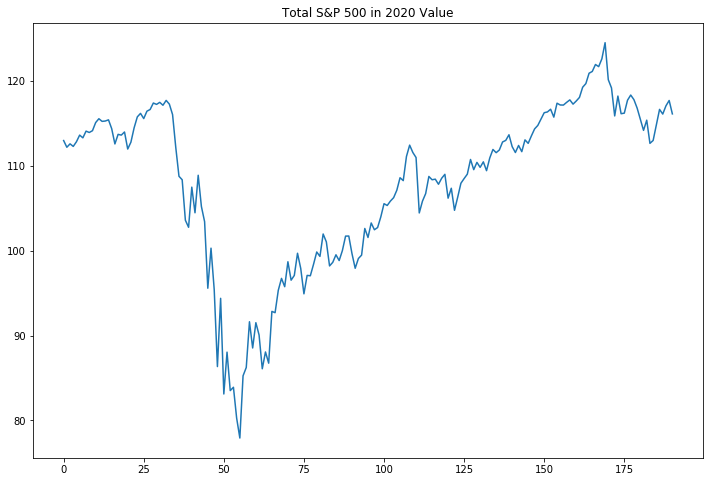

In [72]:
stocks['FXAIX_stock'].plot(figsize = (12, 8))
plt.title('Total S&P 500 in 2020 Value')